In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
# Read and load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/refs/heads/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Data set information
data.info()

# Summary statistics
data.describe()

# Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Check for the remaining missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


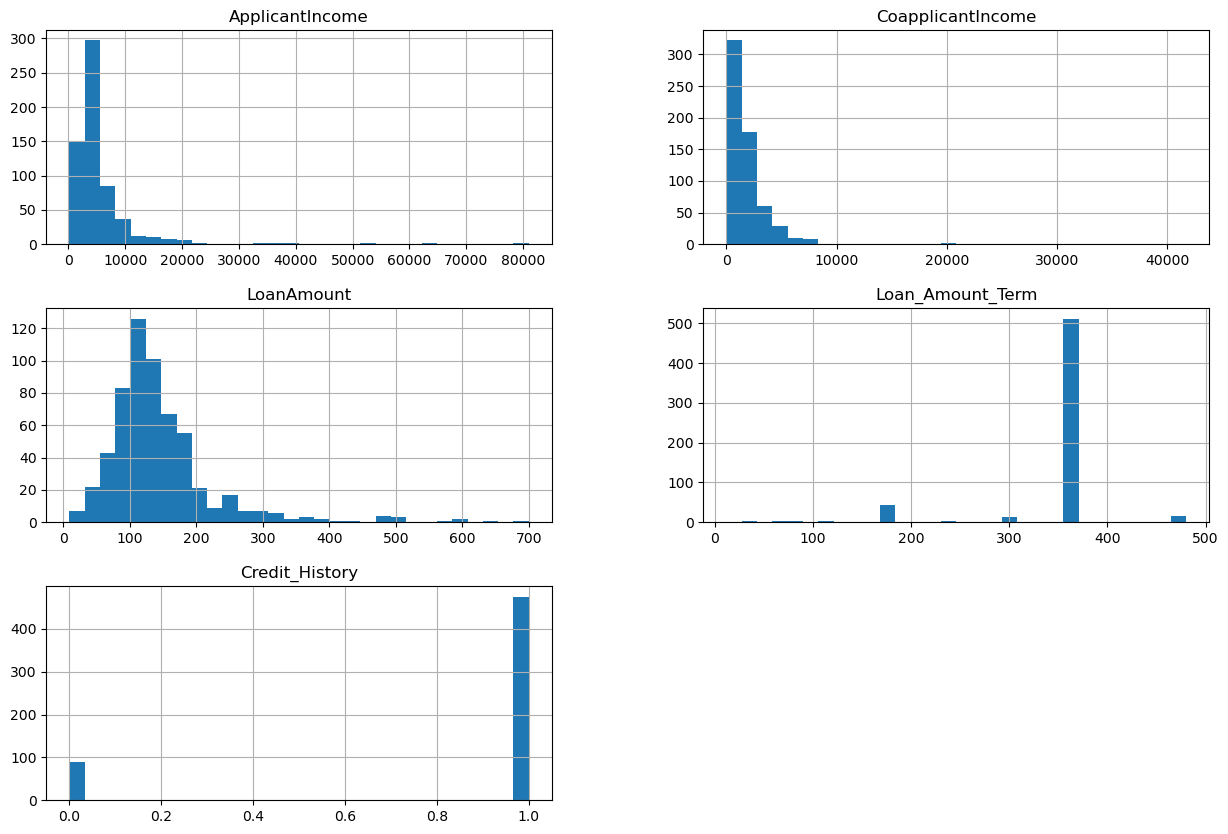

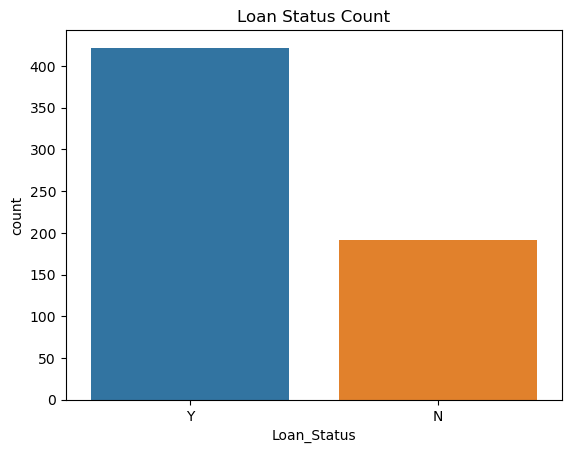

In [5]:
# Visualizing distributions of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Visualizing categorical features
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Count')
plt.show()


In [6]:
# Fill missing values with mode, median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data.dropna(inplace=True)

# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Ensuring there are no missing values
data.isnull().sum()



ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Length: 556, dtype: int64

In [7]:
# Separate features and target variable
X = data.drop('Loan_Status_Y', axis=1) 
y = data['Loan_Status_Y']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Model selection and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

       False       0.76      0.39      0.52        33
        True       0.78      0.95      0.86        76

    accuracy                           0.78       109
   macro avg       0.77      0.67      0.69       109
weighted avg       0.78      0.78      0.76       109

Random Forest Accuracy: 0.78
              precision    recall  f1-score   support

       False       0.74      0.42      0.54        33
        True       0.79      0.93      0.86        76

    accuracy                           0.78       109
   macro avg       0.76      0.68      0.70       109
weighted avg       0.77      0.78      0.76       109



In [9]:
# Cross Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f'{name} Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores):.2f}')


Logistic Regression Cross-Validation Scores: [0.79816514 0.75229358 0.76851852 0.81481481 0.76851852]
Mean CV Score: 0.78
Random Forest Cross-Validation Scores: [0.80733945 0.75229358 0.77777778 0.85185185 0.7962963 ]
Mean CV Score: 0.80


In [10]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 30, 'n_estimators': 200}


In [11]:
import joblib

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_loan_model.pkl')


['best_loan_model.pkl']